# Classification Manuscrite : jeu de données MNIST avec KERAS

**Source :** Cours de Franck Bardol, [LinkedIn Learning](https://www.linkedin.com/learning/decouvrir-le-deep-learning-avec-keras/bienvenue-dans-le-deep-learning-avec-keras?autoplay=true).

**Objectif :** Reconnaitre les chiffres à partir d’une image.

## Importations

In [ ]:
# Jeu de données MNIST :
from keras.datasets import mnist
# Keras :
from keras import models
from keras import layers
from keras.utils import to_categorical
# Autres :
import numpy as np
import matplotlib.pyplot as plt

## Jeu de données

In [ ]:
# Chargement des données
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Nombre d'images dans le dataset
print("Nombres d'images : ", train_images.shape[0])

# Afficher les différents labels 
print("Liste des labels : ", np.unique(train_labels))


Nombres d'images :  60000
Liste des labels :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Description du dataset : 60 000 images, de 28 pixels sur 28 pixels
print("Description du dataset :" , train_images.shape)

Description du dataset : (60000, 28, 28)


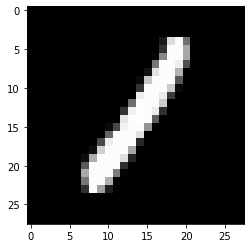


==> Label de l'image :  1


In [ ]:
# Visualisation d'une image aléatoire
from random import randint

# Choix du numéro de l'image 
num_img = randint(0, 60000)

# Affichage de l'image
plt.figure()
plt.imshow(train_images[num_img,:,:], cmap = plt.get_cmap('gray'))
plt.show()

# Affichage du label
print("\n==> Label de l'image : ", train_labels[num_img])

## Préparation des données

### Redimension et normalisation



In [ ]:
# shape de l'image
train_images.shape

(60000, 28, 28)

In [ ]:
# Redimension des images : on ajoute une dimension.
train_images = train_images.reshape((60000, 28, 28, 1)) # 3 pour RGB

# Normalisation des images = échelle entre 0 et 1.
train_images = train_images.astype('float32') / 255    # 255 niveaux de gris

# Idem pour le jeu de test
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
# Après modification :
train_images.shape

(60000, 28, 28, 1)

## Encodage des labels

In [ ]:
# Catégorisation avec: One Hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Construction du réseau de neurones avec Keras

In [ ]:
# initialisation
model = models.Sequential()

# 1ère couche de convolution : 8 filtres de dimension 3*3
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# couche de max pooling (2*2)
model.add(layers.MaxPooling2D((2, 2)))

# 2ème couche de convolution : 16 filtres de dimension 3*3
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
# couche de max pooling (2*2)
model.add(layers.MaxPooling2D((2, 2)))

# 3ème couche de convolution : 16 filtres de dimension 3*3
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

In [ ]:
# couche d'applatissement (flatten) qui applatit les structures en 2D issues de la convolution = 2D > 1D.
model.add(layers.Flatten())

In [ ]:
# couche de traitement dense : MLP, analyse les structures
model.add(layers.Dense(256, activation='relu'))

In [ ]:
# couche de décision : émet une probabilité d'une classe
model.add(layers.Dense(10, activation='softmax'))

## Structure du modèle

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 16)          2320      
                                                                 
 flatten_6 (Flatten)         (None, 144)              

## Compilation du modèle

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Entraînement du modèle

In [ ]:
history = model.fit(train_images, 
          train_labels, 
          validation_split = 0.1,   # 10% des données pour le jeu de validation
          epochs = 7,              # nombre d'epochs
          batch_size = 500)         # taille du batch

Epoch 1/7
108/108 [==============================] - 2s 10ms/step - loss: 0.6672 - accuracy: 0.7999 - val_loss: 0.2073 - val_accuracy: 0.9377
Epoch 2/7
108/108 [==============================] - 1s 6ms/step - loss: 0.2101 - accuracy: 0.9359 - val_loss: 0.1287 - val_accuracy: 0.9603
Epoch 3/7
108/108 [==============================] - 1s 6ms/step - loss: 0.1381 - accuracy: 0.9576 - val_loss: 0.1085 - val_accuracy: 0.9692
Epoch 4/7
108/108 [==============================] - 1s 6ms/step - loss: 0.1036 - accuracy: 0.9684 - val_loss: 0.0766 - val_accuracy: 0.9785
Epoch 5/7
108/108 [==============================] - 1s 6ms/step - loss: 0.0836 - accuracy: 0.9743 - val_loss: 0.0710 - val_accuracy: 0.9795
Epoch 6/7
108/108 [==============================] - 1s 6ms/step - loss: 0.0715 - accuracy: 0.9774 - val_loss: 0.0675 - val_accuracy: 0.9802
Epoch 7/7
108/108 [==============================] - 1s 6ms/step - loss: 0.0627 - accuracy: 0.9804 - val_loss: 0.0544 - val_accuracy: 0.9843


## Courbe d'apprentissage

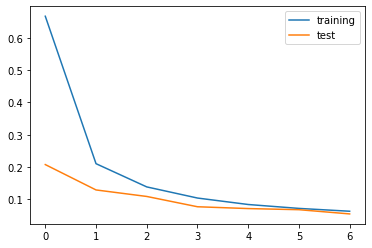

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training","test"])

## Evaluation du modèle

In [ ]:
# Evaluation
print(model.evaluate(test_images, test_labels))

313/313 [==============================] - 1s 3ms/step - loss: 0.0473 - accuracy: 0.9840
[0.04732956364750862, 0.984000027179718]


## Sauvegarde du modèle

In [ ]:
# connexion à google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Sauvegarde de la structure du réseau

In [ ]:
#====================#====================#====================
# ===================== SAVE  ===================================
#====================#====================#====================

#  model to JSON
model_json = model.to_json()
print("Enregistrement du modèle.")

with open('/content/gdrive/My Drive/model.json', 'w') as json_f:
    json_f.write(model_json)

Enregistrement du modèle.


### Sauvegarde des paramètres du réseau

In [ ]:
#====================#====================#====================
# ===================== SAVE  ===================================
#====================#====================#====================# weights to HDF5

print("Enregistrement des poids du modèle.")
model.save_weights("/content/gdrive/My Drive/model.h5")

Enregistrement des poids du modèle.
